In [101]:
# imports
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from collections import defaultdict



In [77]:
# Getting the data
maindict = {}
alpha = []


with open('data/cleandata.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for line in reader:
        ints = re.findall(r'\d+', line[2])
        pairs = list(zip(ints[::2], ints[1::2]))
        for year, visitor in pairs:
            alpha.append({'year' : year, 'visitors' : visitor})
        maindict[line[0]] = alpha

In [120]:
year_sets = []

for i in maindict:
    current_years = set()
    for j in maindict[i]:
        y = int(j.get('year'))
        if y is not None and (y % 10 == 0):
            current_years.add(y)
    year_sets.append(current_years)

common_years = set.intersection(*year_sets)
year_totals = defaultdict(int)

for i in maindict:
    for j in maindict[i]:
        y = int(j.get('year'))
        v = int(j.get('visitors'))
        if y in common_years and v is not None:
            year_totals[y] += v

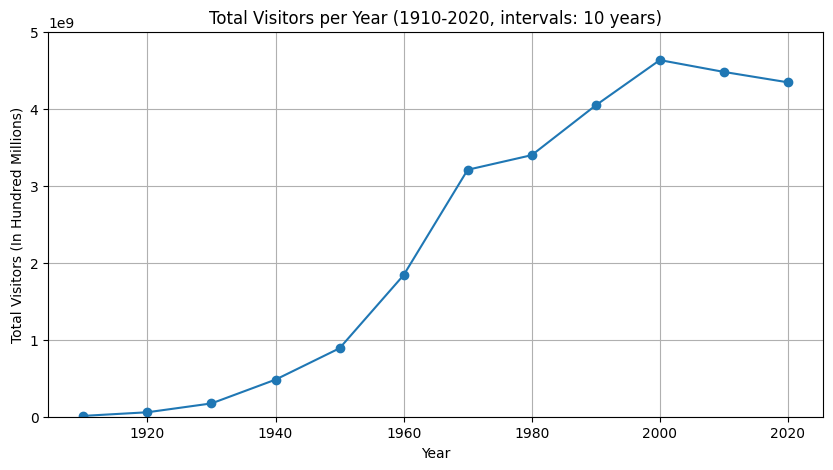

In [143]:
common_years = set.intersection(*year_sets)
final_years = sorted(common_years)
final_visitors = [year_totals[y] for y in final_years]

plt.figure(figsize=(10, 5))
plt.plot(final_years, final_visitors, marker='o')
plt.xlabel('Year')
plt.ylabel('Total Visitors (In Hundred Millions)')
plt.title('Total Visitors per Year (1910-2020, intervals: 10 years)')
plt.ylim(0, 5000000000)
plt.grid(True)
plt.savefig("lineGraph.png")
plt.show()